In [1]:
import json
import pandas as pd

In [2]:
try:
    with open('./data/hotels_korea_reviews_text.json') as file:
        a=file.read()
except Exception as e:
    print(e)
    with open('./data/hotels_korea_reviews_text.json',encoding="utf-8") as file:
        a=file.read()
a[:100]

'[\n  {\n    "data": {\n      "page": {\n        "html": {\n          "lang": "ko",\n          "langdir": "'

### 로드 후 길이재기

In [3]:
b=json.loads(a)
len(b)

9027

In [10]:
b[0] # JSON포매터로 필요한걸 찾아봄 파이썬창에서 구조파악이 어려움.

{'data': {'page': {'html': {'lang': 'ko',
    'langdir': 'LTR',
    'locale': 'ko_KR',
    'attributes': {'xmlns:fb': 'http://www.facebook.com/2008/fbml'}},
   'head': {'title': '거제 상상속의집 (SangSang Hotel) 이용 후기',
    'links': [{'href': 'https://kr.hotels.com/ho1041793024-tr-p1/sangsangsog-uijib-geoje-hangug/',
      'rel': 'canonical'},
     {'href': 'https://es.hoteles.com/ho1041793024-tr-p1/sangsang-hotel-geoje-corea-del-sur/',
      'hreflang': 'es-ES',
      'rel': 'alternate'},
     {'href': 'https://ca.hotels.com/ho1041793024-tr-p1/sangsang-hotel-geoje-south-korea/',
      'hreflang': 'en-CA',
      'rel': 'alternate'},
     {'href': 'https://sg.hotels.com/ho1041793024-tr-p1/sangsang-hotel-geoje-south-korea/',
      'hreflang': 'en-SG',
      'rel': 'alternate'},
     {'href': 'https://www.hoteles.com/ho1041793024-tr-p1/sangsang-hotel-geoje-corea-del-sur/',
      'hreflang': 'es-MX',
      'rel': 'alternate'},
     {'href': 'https://uk.hotels.com/ho1041793024-tr-p1/sangsang-hotel

두가지 테이블을 제시하는대로 DataFrame으로 만들기.

### 찾는 데이터(hotelid) 위치 파악 후
- 파이썬에서 해당키를 출력해본후 맞는값이 나오면 변수에담기

In [ ]:
#호텔ID
hotel_id=b[0]["data"]["body"]["pdpHeader"]['hotelId']

In [14]:
#호텔이름
hotel_name=b[0]["data"]["body"]["propertyDescription"]['name']

In [22]:
#총리뷰수
totalCount=b[0]["data"]["body"]["reviewContent"]['overall']['totalCount']

In [22]:
#리뷰평균평점
avg_rating=b[0]["data"]["body"]["reviewContent"]['overall']['rating']

In [22]:
#청결도
clean=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['cleanliness']
#서비스
service=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['service']
#편안함
comfort=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['comfort']
#시설상태
condition=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['condition']
#주변환경
neighbourhood=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['neighbourhood']

In [30]:
#지역
region=b[0]["data"]["body"]["propertyDescription"]['address']['region']

'경상남도'

In [28]:
#시도
locality=b[0]["data"]["body"]["propertyDescription"]['address']['locality']

이제 모으기

In [36]:
c={}
#호텔ID
hotel_id=b[0]["data"]["body"]["pdpHeader"]['hotelId']
#호텔이름
hotel_name=b[0]["data"]["body"]["propertyDescription"]['name']
#총리뷰수
totalCount=b[0]["data"]["body"]["reviewContent"]['overall']['totalCount']

#리뷰평균평점
avg_rating=b[0]["data"]["body"]["reviewContent"]['overall']['rating']
#청결도
clean=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['cleanliness']
#서비스
service=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['service']

#편안함
comfort=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['comfort']
#시설상태
condition=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['condition']
#주변환경
neighbourhood=b[0]["data"]["body"]["reviewContent"]['overall']['ratingAspects']['neighbourhood']

#지역
region=b[0]["data"]["body"]["propertyDescription"]['address']['region']
#시도
locality=b[0]["data"]["body"]["propertyDescription"]['address']['locality']


c.setdefault("hotel_id",[]).append(hotel_id)
c.setdefault("hotel_name",[]).append(hotel_name)
c.setdefault("totalCount",[]).append(totalCount)

c.setdefault("avg_rating",[]).append(avg_rating)
c.setdefault("clean",[]).append(clean)
c.setdefault("service",[]).append(service)

c.setdefault("comfort",[]).append(comfort)
c.setdefault("condition",[]).append(condition)
c.setdefault("neighbourhood",[]).append(neighbourhood)

c.setdefault("region",[]).append(region)
c.setdefault("locality",[]).append(locality)

c

{'hotel_id': [1041793024],
 'hotel_name': ['상상속의집 (SangSang Hotel)'],
 'totalCount': [67],
 'avg_rating': ['7.8'],
 'clean': ['8.0'],
 'service': ['7.6'],
 'comfort': ['8.2'],
 'condition': ['7.8'],
 'neighbourhood': ['8.2'],
 'region': ['경상남도'],
 'locality': ['거제시']}

In [46]:
c={} ####### 반복문 얹기 ############
for i,d in enumerate(b):
    print(f"{i}/{len(b)} 페이지 데이터 추출 중", end="\r")

    #호텔ID
    hotel_id=d["data"]["body"]["pdpHeader"]['hotelId']
    #호텔이름
    hotel_name=d["data"]["body"]["propertyDescription"]['name']
    #총리뷰수
    totalCount=d["data"]["body"]["reviewContent"]['overall']['totalCount']

    #리뷰평균평점
    avg_rating=d["data"]["body"]["reviewContent"]['overall']['rating']
    #청결도
    clean=d["data"]["body"]["reviewContent"]['overall']['ratingAspects'].get('cleanliness',0.0)
    #서비스
    service=d["data"]["body"]["reviewContent"]['overall']['ratingAspects'].get('service',0.0)

    #편안함
    comfort=d["data"]["body"]["reviewContent"]['overall']['ratingAspects'].get('comfort',0.0)
    #시설상태
    condition=d["data"]["body"]["reviewContent"]['overall']['ratingAspects'].get('condition',0.0)
    #주변환경
    neighbourhood=d["data"]["body"]["reviewContent"]['overall']['ratingAspects'].get('neighbourhood',0.0)

    #시도
    locality=d["data"]["body"]["propertyDescription"]['address']['locality']
    #지역
    region=d["data"]["body"]["propertyDescription"]['address'].get('region', locality)



    c.setdefault("hotel_id",[]).append(hotel_id)
    c.setdefault("hotel_name",[]).append(hotel_name)
    c.setdefault("totalCount",[]).append(totalCount)

    c.setdefault("avg_rating",[]).append(avg_rating)
    c.setdefault("clean",[]).append(clean)
    c.setdefault("service",[]).append(service)

    c.setdefault("comfort",[]).append(comfort)
    c.setdefault("condition",[]).append(condition)
    c.setdefault("neighbourhood",[]).append(neighbourhood)

    c.setdefault("region",[]).append(region)
    c.setdefault("locality",[]).append(locality)

c_df=pd.DataFrame(c)
c_df

,hotel_id,hotel_name,totalCount,avg_rating,clean,service,comfort,condition,neighbourhood,region,locality
0,1041793024,상상속의집 (SangSang Hotel),67,7.8,8.0,7.6,8.2,7.8,8.2,경상남도,거제시
1,1041793024,상상속의집 (SangSang Hotel),67,7.8,8.0,7.6,8.2,7.8,8.2,경상남도,거제시
2,1041793024,상상속의집 (SangSang Hotel),67,7.8,8.0,7.6,8.2,7.8,8.2,경상남도,거제시
3,589827,바다마루 제주 (Badamaru Jeju),20,8.4,9.0,8.4,8.6,8.4,5.0,제주특별자치도,서귀포시
4,589827,바다마루 제주 (Badamaru Jeju),20,8.4,9.0,8.4,8.6,8.4,5.0,제주특별자치도,서귀포시
...,...,...,...,...,...,...,...,...,...,...,...
9022,507669,호텔 토스카나 (Hotel Toscana),608,9.2,9.2,9.2,9.4,9.2,7.8,제주특별자치도,서귀포시
9023,507669,호텔 토스카나 (Hotel Toscana),608,9.2,9.2,9.2,9.4,9.2,7.8,제주특별자치도,서귀포시
9024,718356256,평창펜션하늘숲 (Pyeongchang The Sky Forest),3,7.4,8.6,8.0,6.6,7.4,6.0,강원도,평창군
9025,718356256,평창펜션하늘숲 (Pyeongchang The Sky Forest),3,7.4,8.6,8.0,6.6,7.4,6.0,강원도,평창군


키에러.<br>
b의 9번째 요소에 문제가 있는것.
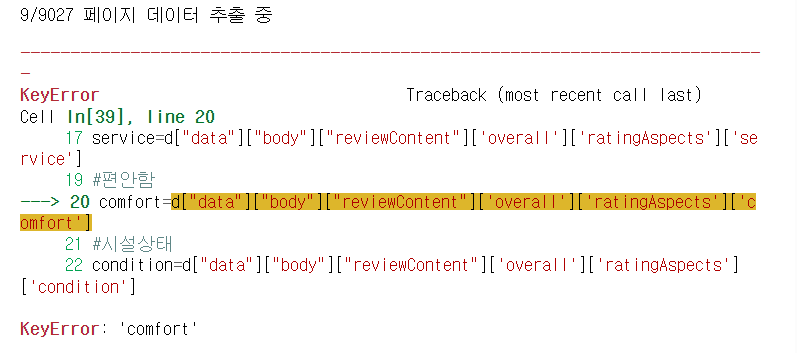
### get함수로 마무리하는게 보편적. <br><br> 처음에는 안써서 오류가 어디있는지 체크함.

In [40]:
# 찍어보면 필요한 정보 여러가지가 누락된상황(그상위폴더도.)
d["data"]["body"]["reviewContent"]['overall']['ratingAspects']
#이런경우 .get 으로 누락된 부분을 채우기로함.

{'cleanliness': '10.0', 'service': '10.0', 'condition': '10.0'}

In [43]:
# 또다른 키에러.

d["data"]["body"]["propertyDescription"]['address']
# region==locality여야하는 상황.
#

{'countryName': '한국',
 'locality': '서울특별시',
 'postalCode': '1168',
 'streetAddress': '강북구 솔매로 62-3',
 'countryAlpha3Code': 'KOR'}